In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dat = pd.read_csv('data/World_Happiness_2015_2017.csv')

In [3]:
dat.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [4]:
dat.shape

(470, 11)

In [5]:
dat.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [6]:
dat['Year'] = dat['Year'].astype('float')
dat.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object

In [7]:
dat.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015.0


In [8]:
dat.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

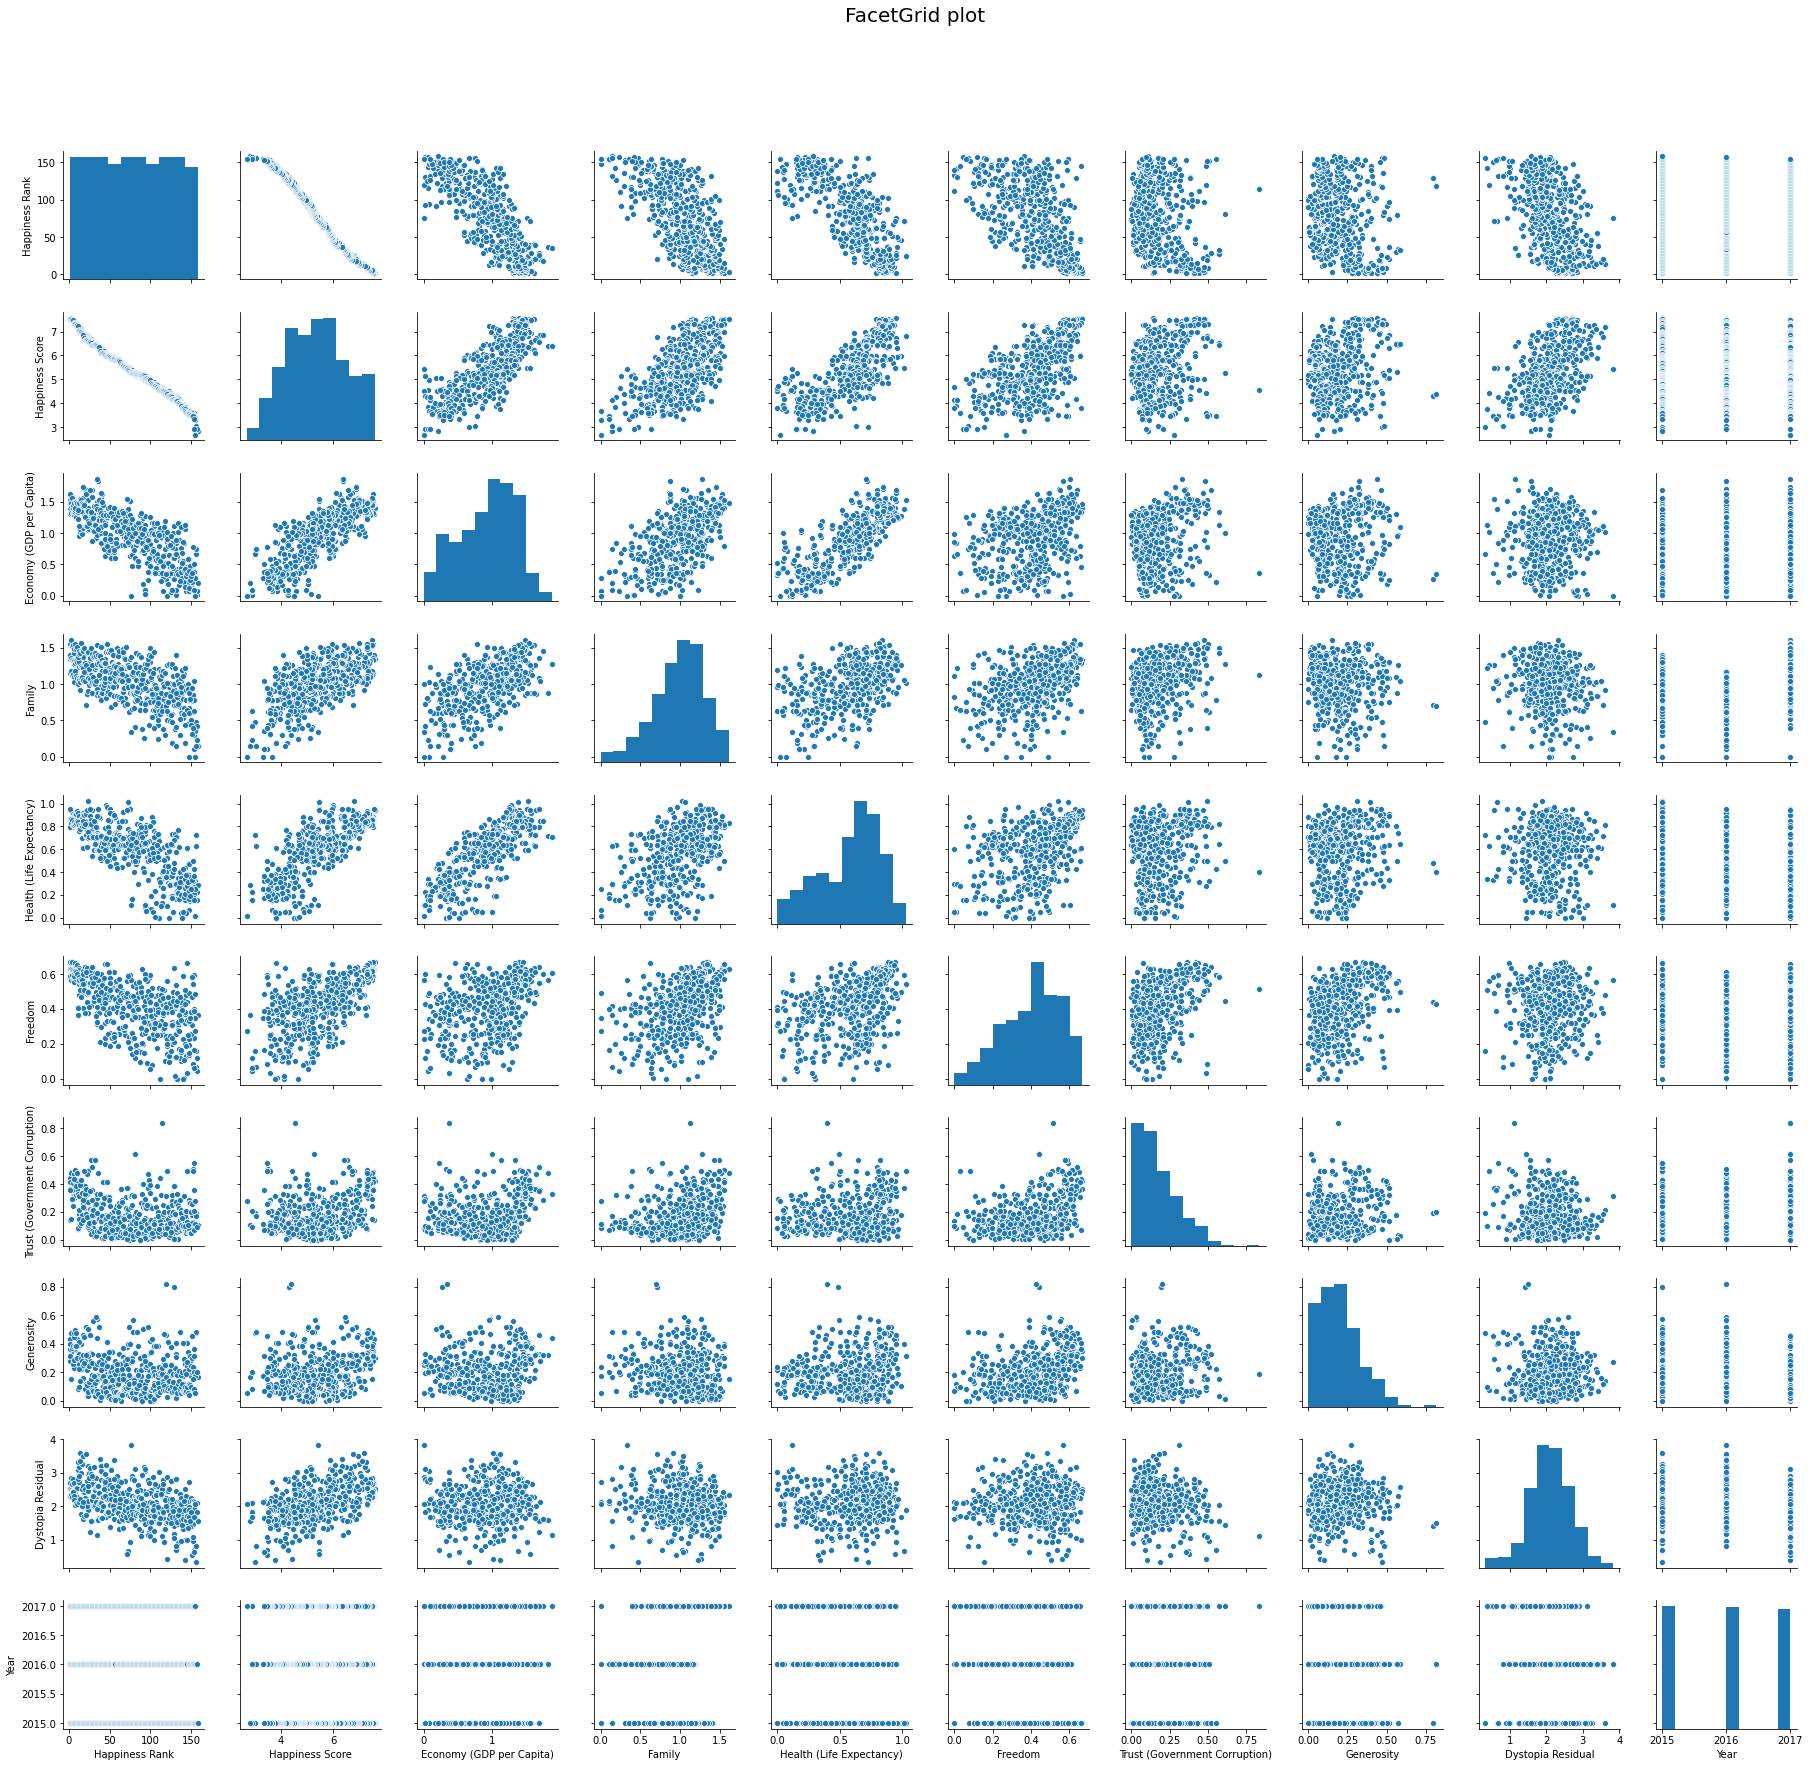

In [9]:
g = sns.pairplot(dat)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

In [10]:
correlations = dat.corr()['Happiness Score']
correlations

Happiness Rank                  -0.993268
Happiness Score                  1.000000
Economy (GDP per Capita)         0.785450
Family                           0.636532
Health (Life Expectancy)         0.748040
Freedom                          0.560353
Trust (Government Corruption)    0.282130
Generosity                       0.221684
Dystopia Residual                0.489747
Year                            -0.007761
Name: Happiness Score, dtype: float64

In [11]:
correlations = correlations.drop(['Happiness Score', 'Happiness Rank']).sort_values(ascending=False)

In [12]:
# count_plot_h is a wrappter for seaborn's barblot, that plots values horizontally, 
# and lables each bar with the value
from data_tools.plotting import count_plot_h

/Users/mmayers/miniconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


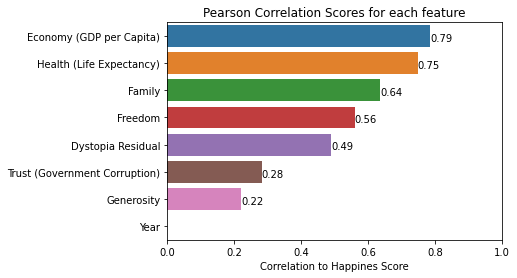

In [13]:
count_plot_h(correlations)
plt.xlim([0, 1])
plt.title('Pearson Correlation Scores for each feature')
plt.xlabel('Correlation to Happines Score');

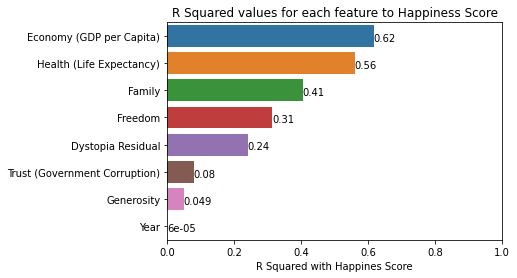

In [14]:
count_plot_h(correlations**2)
plt.xlim([0, 1])
plt.title('R Squared values for each feature to Happiness Score')
plt.xlabel('R Squared with Happines Score');

This formula: 
    
$ Happiness Score = Economic (GDP per cap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual $
    
implies that Happiness score is the dependant variable, therefore it should be plotted on the y axis

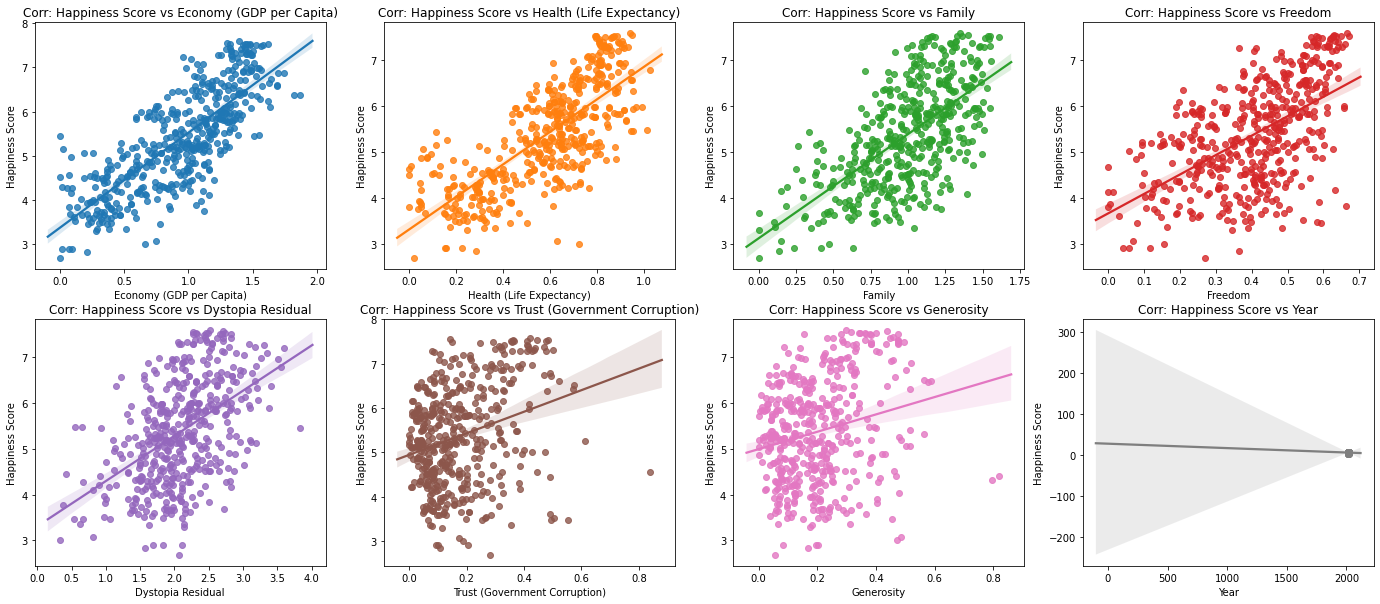

In [15]:
fig, ax = plt.subplots(2, len(correlations)//2)
row = 2
col = ax.shape[1]

fig.set_size_inches(6*col, 5*row)

for i, feature in enumerate(correlations.index):
    to_regress = [feature, 'Happiness Score']
    (sns.regplot(y='Happiness Score', x=feature, ax=ax[i//col][i%col], data=dat[to_regress])
        .set_title("Corr: Happiness Score vs {}".format(feature)))

It appears that GDP per capita and Heath, Life Expepectency have the greatest effect on Happiness Score.

Year has basically no norrelation, and Geneorsity and Government Corruption are very poorly correlated